In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2 
import seaborn as sns
sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [4]:
df_comp['market_value']=df_comp.ftse

In [5]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [6]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(4)
    return p

In [7]:
#Calcualte the returns
df['returns'] = df.market_value.pct_change(1)*100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


ARMA(1,1)

In [8]:
model_ret_ar_1_ma_1 = ARMA(df.returns[1:], order=(1,1))
results_ret_ar_1_ma_1 = model_ret_ar_1_ma_1.fit()
print("Variables        pvalues")
if(any(i >0.05 for i in results_ret_ar_1_ma_1.pvalues)):
  print(round(results_ret_ar_1_ma_1.pvalues,3))

Variables        pvalues
const            0.148
ar.L1.returns    0.000
ma.L1.returns    0.000
dtype: float64


In [9]:
#positive ar.L1.returns suggest positive trend, 
#ma.L1.returns is more difficult to interpret,
#it means that the previous actual values are not good targets for future estimation of the new ones
results_ret_ar_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 1)   Log Likelihood               -7916.500
Method:                       css-mle   S.D. of innovations              1.171
Date:                Sat, 14 Aug 2021   AIC                          15841.000
Time:                        17:48:40   BIC                          15867.085
Sample:                    01-10-1994   HQIC                         15850.140
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.446      0.148      -0.007       0.045
ar.L1.returns     0.7649      0.067     11.349      0.000       0.633       0.897
ma.L1.returns    -0.8141      0.061    -13.406      0.000      -0.933      -0.695
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3074           +0.0000j            1.3074            0.0000
MA.1            1.2284           +0.0000j            1.2284            0.0000
-----------------------------------------------------------------------------
"""

In [10]:
model_ret_ar_1 = ARMA(df.returns[1:], order = (1,0))
model_ret_ma_1 = ARMA(df.returns[1:], order = (0,1))
results_ret_ar_1 = model_ret_ar_1.fit()
results_ret_ma_1 = model_ret_ma_1.fit()

print("\nAR vs ARMA ", LLR_test(results_ret_ar_1, results_ret_ar_1_ma_1))
print("\nMA vs ARMA ", LLR_test(results_ret_ma_1, results_ret_ar_1_ma_1))


AR vs ARMA  0.0

MA vs ARMA  0.0


In [11]:
model_ret_ar_3_ma_3 = ARMA(df.returns[1:], order=(3,3))
results_ret_ar_3_ma_3 = model_ret_ar_3_ma_3.fit()
print("Variables        pvalues")
if(any(i >0.05 for i in results_ret_ar_3_ma_3.pvalues)):
  print(round(results_ret_ar_3_ma_3.pvalues,3))

Variables        pvalues
const            0.163
ar.L1.returns    0.068
ar.L2.returns    0.001
ar.L3.returns    0.001
ma.L1.returns    0.084
ma.L2.returns    0.007
ma.L3.returns    0.000
dtype: float64


In [12]:
LLR_test(results_ret_ar_1_ma_1, results_ret_ar_3_ma_3, DF = 4)

0.0

In [13]:
model_ret_ar_3_ma_2 = ARMA(df.returns[1:], order=(3,2))
results_ret_ar_3_ma_2 = model_ret_ar_3_ma_2.fit()
print("Variables        pvalues")
if(any(i >0.05 for i in results_ret_ar_3_ma_2.pvalues)):
  print(round(results_ret_ar_3_ma_2.pvalues,3))
  

Variables        pvalues
const            0.211
ar.L1.returns    0.000
ar.L2.returns    0.000
ar.L3.returns    0.000
ma.L1.returns    0.000
ma.L2.returns    0.002
dtype: float64


In [14]:
LLR_test(results_ret_ar_3_ma_2, results_ret_ar_3_ma_3)

0.0346

In [15]:
model_ret_ar_2_ma_3 = ARMA(df.returns[1:], order=(2,3))
results_ret_ar_2_ma_3 = model_ret_ar_2_ma_3.fit()
print("Variables        pvalues")
if(any(i >0.05 for i in results_ret_ar_2_ma_3.pvalues)):
  print(round(results_ret_ar_2_ma_3.pvalues,3))
  

Variables        pvalues
const            0.202
ar.L1.returns    0.000
ar.L2.returns    0.030
ma.L1.returns    0.000
ma.L2.returns    0.069
ma.L3.returns    0.000
dtype: float64


In [16]:
model_ret_ar_3_ma_1 = ARMA(df.returns[1:], order=(3,1))
results_ret_ar_3_ma_1 = model_ret_ar_3_ma_1.fit()
print("Variables        pvalues")
if(any(i >0.05 for i in results_ret_ar_3_ma_1.pvalues)):
  print(round(results_ret_ar_3_ma_1.pvalues,3))

Variables        pvalues
const            0.194
ar.L1.returns    0.000
ar.L2.returns    0.000
ar.L3.returns    0.000
ma.L1.returns    0.000
dtype: float64


In [17]:
LLR_test(results_ret_ar_3_ma_1, results_ret_ar_3_ma_3)

0.0009

In [18]:
model_ret_ar_2_ma_2 = ARMA(df.returns[1:], order=(2,2))
results_ret_ar_2_ma_2 = model_ret_ar_2_ma_2.fit()
print("Variables        pvalues")
if(any(i >0.05 for i in results_ret_ar_2_ma_2.pvalues)):
  print(round(results_ret_ar_2_ma_2.pvalues,3))

Variables        pvalues
const            0.163
ar.L1.returns    0.001
ar.L2.returns    0.377
ma.L1.returns    0.001
ma.L2.returns    0.530
dtype: float64


In [19]:
model_ret_ar_1_ma_3 = ARMA(df.returns[1:], order=(1,3))
results_ret_ar_1_ma_3 = model_ret_ar_1_ma_3.fit()
print("Variables        pvalues")
if(any(i >0.05 for i in results_ret_ar_1_ma_3.pvalues)):
  print(round(results_ret_ar_1_ma_3.pvalues,3))

Variables        pvalues
const            0.183
ar.L1.returns    0.000
ma.L1.returns    0.000
ma.L2.returns    0.000
ma.L3.returns    0.000
dtype: float64


In [20]:
print("\n ARMA(3,2): \tLL = ", results_ret_ar_3_ma_2.llf, "\tAIC = ", results_ret_ar_3_ma_2.aic)
print("\n ARMA(1,3): \tLL = ", results_ret_ar_1_ma_3.llf, "\tAIC = ", results_ret_ar_1_ma_3.aic)


 ARMA(3,2): 	LL =  -7895.7474585146265 	AIC =  15805.494917029253

 ARMA(1,3): 	LL =  -7896.837893752794 	AIC =  15805.675787505588


We prefer the ARMA model

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


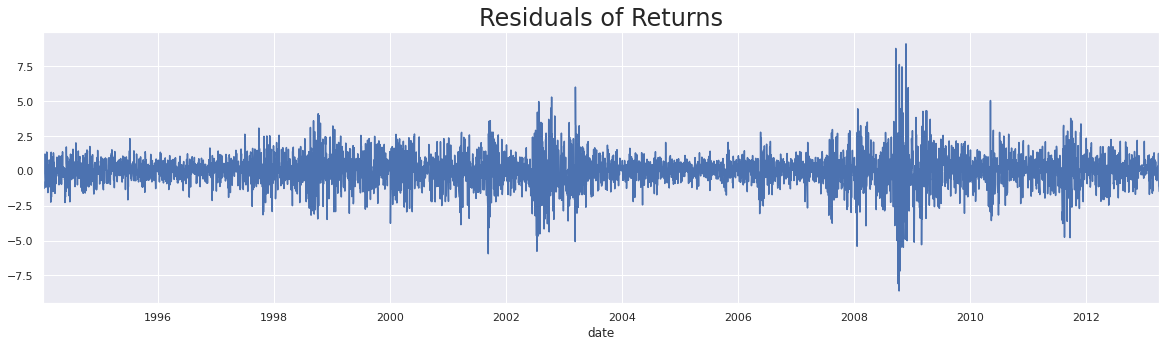

In [21]:
df['res_ret_ar_3_ma_2'] = results_ret_ar_3_ma_2.resid[1:]
df.res_ret_ar_3_ma_2.plot(figsize = (20,5))
plt.title("Residuals of Returns", size=24)
plt.show()

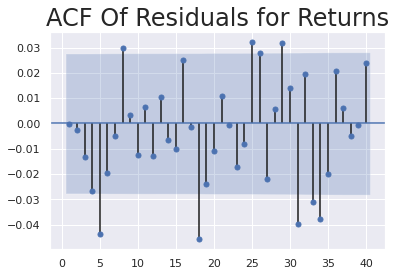

In [22]:
sgt.plot_acf(df.res_ret_ar_3_ma_2[2:], zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

In [23]:
model_ret_ar_5_ma_5 = ARMA(df.returns[1:], order=(5,5))
results_ret_ar_5_ma_5 = model_ret_ar_5_ma_5.fit()
results_ret_ar_5_ma_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(5, 5)   Log Likelihood               -7882.160
Method:                       css-mle   S.D. of innovations              1.163
Date:                Sat, 14 Aug 2021   AIC                          15788.321
Time:                        17:49:08   BIC                          15866.575
Sample:                    01-10-1994   HQIC                         15815.742
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.402      0.161      -0.008       0.045
ar.L1.returns    -0.0684      0.140     -0.490      0.624      -0.342       0.205
ar.L2.returns    -0.6722      0.146     -4.603      0.000      -0.958      -0.386
ar.L3.returns    -0.1152      0.141     -0.817      0.414      -0.392       0.161
ar.L4.returns     0.1779      0.129      1.381      0.167      -0.075       0.430
ar.L5.returns     0.1215      0.107      1.132      0.258      -0.089       0.332
ma.L1.returns     0.0443      0.138      0.322      0.748      -0.226       0.314
ma.L2.returns     0.6223      0.144      4.321      0.000       0.340       0.905
ma.L3.returns     0.0107      0.136      0.079      0.937      -0.256       0.277
ma.L4.returns    -0.1753      0.122     -1.436      0.151      -0.415       0.064
ma.L5.returns    -0.2240      0.104     -2.148      0.032      -0.428      -0.020
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0870           -1.0364j            1.0401           -0.2367
AR.2            0.0870           +1.0364j            1.0401            0.2367
AR.3            1.7715           -0.0000j            1.7715           -0.0000
AR.4           -1.7050           -1.1784j            2.0726           -0.4038
AR.5           -1.7050           +1.1784j            2.0726            0.4038
MA.1            0.1033           -1.0434j            1.0485           -0.2343
MA.2            0.1033           +1.0434j            1.0485            0.2343
MA.3            1.4855           -0.0000j            1.4855           -0.0000
MA.4           -1.2373           -1.0965j            1.6532           -0.3846
MA.5           -1.2373           +1.0965j            1.6532            0.3846
-----------------------------------------------------------------------------
"""

In [24]:
model_ret_ar_5_ma_1 = ARMA(df.returns[1:], order=(5,1))
results_ret_ar_5_ma_1 = model_ret_ar_5_ma_1.fit()
print("Variables        pvalues")
if(any(i >0.05 for i in results_ret_ar_5_ma_1.pvalues)):
  print(round(results_ret_ar_5_ma_1.pvalues,3))

Variables        pvalues
const            0.159
ar.L1.returns    0.009
ar.L2.returns    0.003
ar.L3.returns    0.000
ar.L4.returns    0.000
ar.L5.returns    0.000
ma.L1.returns    0.005
dtype: float64


In [26]:
model_ret_ar_1_ma_5 = ARMA(df.returns[1:], order=(1,5))
results_ret_ar_1_ma_5 = model_ret_ar_1_ma_5.fit()
print("Variables        pvalues")
if(any(i >0.05 for i in results_ret_ar_1_ma_5.pvalues)):
  print(round(results_ret_ar_1_ma_5.pvalues,3))

Variables        pvalues
const            0.156
ar.L1.returns    0.031
ma.L1.returns    0.020
ma.L2.returns    0.009
ma.L3.returns    0.000
ma.L4.returns    0.000
ma.L5.returns    0.000
dtype: float64


In [27]:
print("ARMA(5,1):  \t LL = ",results_ret_ar_5_ma_1.llf,"\t AIC = ",results_ret_ar_5_ma_1.aic)
print("ARMA(1,5):  \t LL = ",results_ret_ar_1_ma_5.llf,"\t AIC = ",results_ret_ar_1_ma_5.aic)

ARMA(5,1):  	 LL =  -7889.311282946059 	 AIC =  15794.622565892118
ARMA(1,5):  	 LL =  -7890.973460209495 	 AIC =  15797.94692041899


In [29]:
print("ARMA(3,2):  \t LL = ",results_ret_ar_3_ma_2.llf,"\t AIC = ",results_ret_ar_3_ma_2.aic)

ARMA(3,2):  	 LL =  -7895.7474585146265 	 AIC =  15805.494917029253


Residuals for AR(5,1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


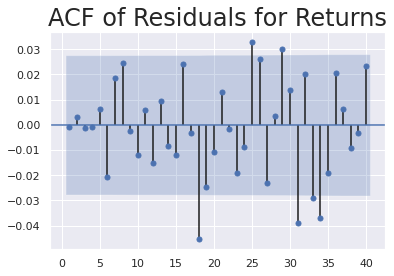

In [30]:
df['res_ret_ar_5_ma_1'] = results_ret_ar_5_ma_1.resid
sgt.plot_acf(df.res_ret_ar_5_ma_1[1:], zero = False, lags = 40)
plt.title("ACF of Residuals for Returns",size=24)
plt.show()
#the residuals are shown to be random since they are not significant in the first 10 lags